In [ ]:
from data_analysis_utils import *
from pathlib import Path

experiments_dir = 'experiments'

experiment_path = Path(obtain_experiment_path_by_idx(experiments_dir,0))

checkpoints_dir = Path('checkpoints')

checkpoints_path = experiment_path / checkpoints_dir

album_path = '/data/i3store/users/ssued/albums/RNO_album_10_13_2025_10k'

Experiment at id 0: exp_e100000_bn128_tr642_te161_lfn-HuberLoss_opt-Adam_del50


In [15]:
latest_checkpoint = Path('checkpoint_e11600.pth')

latest_checkpoint_path = checkpoints_path / latest_checkpoint

In [ ]:
# Import data_analysis_utils (INCLUDES ALL OTHER UTILS!)
from data_analysis_utils import *
from torch.utils.data import DataLoader

album = AlbumDataset(album_path, transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

latest_model = RNO_four_1_0_0_batch_norm(input_shape=1,
                          hidden_units=10, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )


checkpoint = torch.load(latest_checkpoint_path)

latest_model.load_state_dict(checkpoint['model_state_dict'])

x,y,z = obtain_average_prediction_distance(latest_model,data_loader,10_000)

  0%|          | 0/102678 [00:00<?, ?it/s]

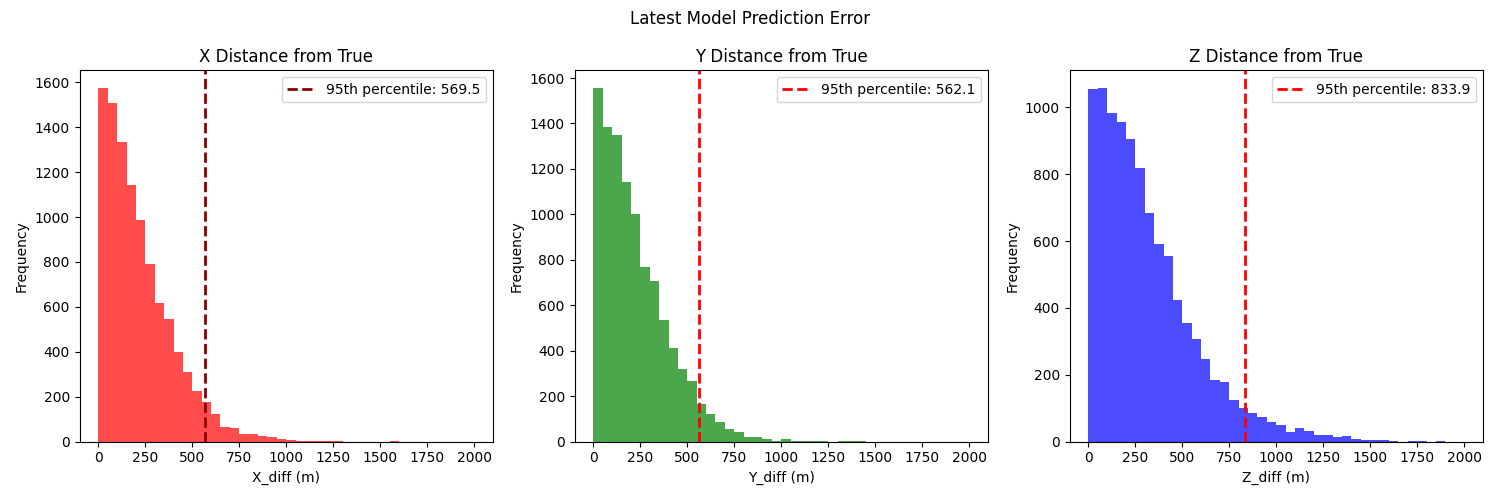

95% of X values are below: 569.47
95% of Y values are below: 562.14
95% of Z values are below: 833.85


In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 2050, 50)

# Calculate 95th percentiles
x_95th = np.percentile(x, 95)
y_95th = np.percentile(y, 95)
z_95th = np.percentile(z, 95)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Latest Model Prediction Error')

ax1.hist(x, bins=bins, alpha=0.7, color='red')
ax1.axvline(x_95th, color='darkred', linestyle='--', linewidth=2, label=f'95th percentile: {x_95th:.1f}')
ax1.set_xlabel('X_diff (m)')
ax1.set_ylabel('Frequency')
ax1.set_title('X Distance from True')
ax1.legend()

ax2.hist(y, bins=bins, alpha=0.7, color='green')
ax2.axvline(y_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {y_95th:.1f}')
ax2.set_xlabel('Y_diff (m)')
ax2.set_ylabel('Frequency')
ax2.set_title('Y Distance from True')
ax2.legend()

ax3.hist(z, bins=bins, alpha=0.7, color='blue')
ax3.axvline(z_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {z_95th:.1f}')
ax3.set_xlabel('Z_diff (m)')
ax3.set_ylabel('Frequency')
ax3.set_title('Z Distance from True')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"95% of X values are below: {x_95th:.2f}")
print(f"95% of Y values are below: {y_95th:.2f}")
print(f"95% of Z values are below: {z_95th:.2f}")

---

In [6]:
# Import data_analysis_utils (INCLUDES ALL OTHER UTILS!)
from data_analysis_utils import *
from torch.utils.data import DataLoader

album = AlbumDataset('/i3store/users/ssued/albums/album.hdf5', transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

x_rand,y_rand,z_rand = obtain_random_average_prediction_distance(data_loader,limit=10_000)

  0%|          | 0/102678 [00:00<?, ?it/s]

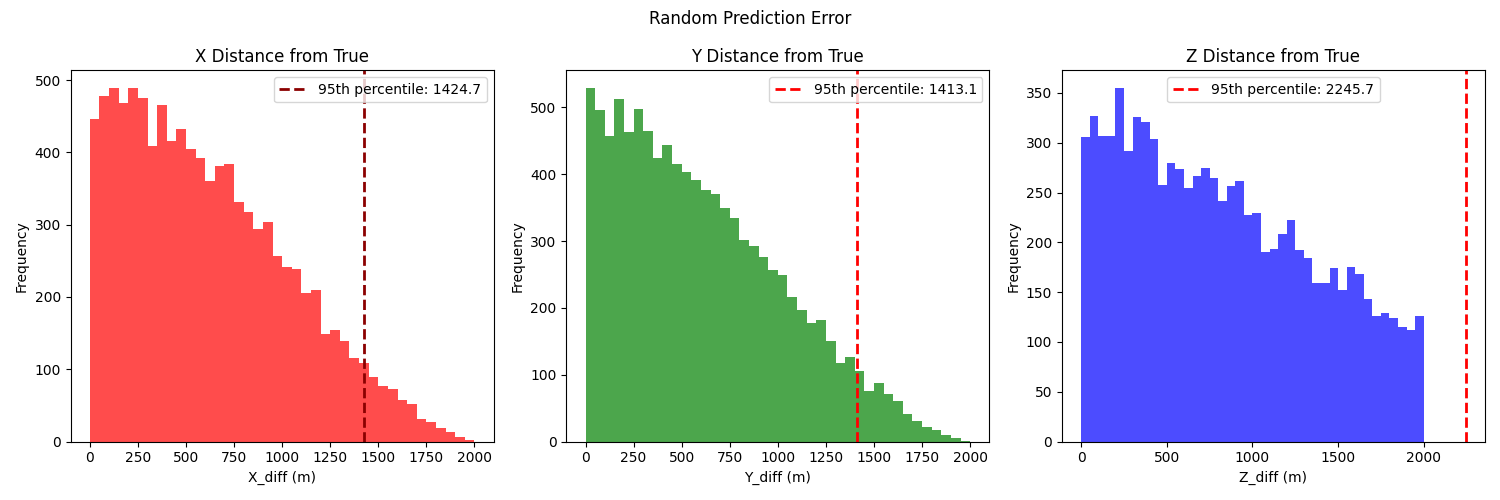

95% of X values are below: 1424.74
95% of Y values are below: 1413.07
95% of Z values are below: 2245.67


In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 2050, 50)

# Calculate 95th percentiles
x_95th = np.percentile(x_rand, 95)
y_95th = np.percentile(y_rand, 95)
z_95th = np.percentile(z_rand, 95)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Random Prediction Error')

ax1.hist(x_rand, bins=bins, alpha=0.7, color='red')
ax1.axvline(x_95th, color='darkred', linestyle='--', linewidth=2, label=f'95th percentile: {x_95th:.1f}')
ax1.set_xlabel('X_diff (m)')
ax1.set_ylabel('Frequency')
ax1.set_title('X Distance from True')
ax1.legend()

ax2.hist(y_rand, bins=bins, alpha=0.7, color='green')
ax2.axvline(y_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {y_95th:.1f}')
ax2.set_xlabel('Y_diff (m)')
ax2.set_ylabel('Frequency')
ax2.set_title('Y Distance from True')
ax2.legend()

ax3.hist(z_rand, bins=bins, alpha=0.7, color='blue')
ax3.axvline(z_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {z_95th:.1f}')
ax3.set_xlabel('Z_diff (m)')
ax3.set_ylabel('Frequency')
ax3.set_title('Z Distance from True')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"95% of X values are below: {x_95th:.2f}")
print(f"95% of Y values are below: {y_95th:.2f}")
print(f"95% of Z values are below: {z_95th:.2f}")

---

In [9]:
# Import data_analysis_utils (INCLUDES ALL OTHER UTILS!)
from data_analysis_utils import *
from torch.utils.data import DataLoader

album = AlbumDataset('/i3store/users/ssued/albums/album.hdf5', transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

untrained_model = VertexFinder1_0_0(input_shape=1,
                          hidden_units=10, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

x_unt,y_unt,z_unt = obtain_average_prediction_distance(untrained_model,data_loader,10_000)

  0%|          | 0/102678 [00:00<?, ?it/s]

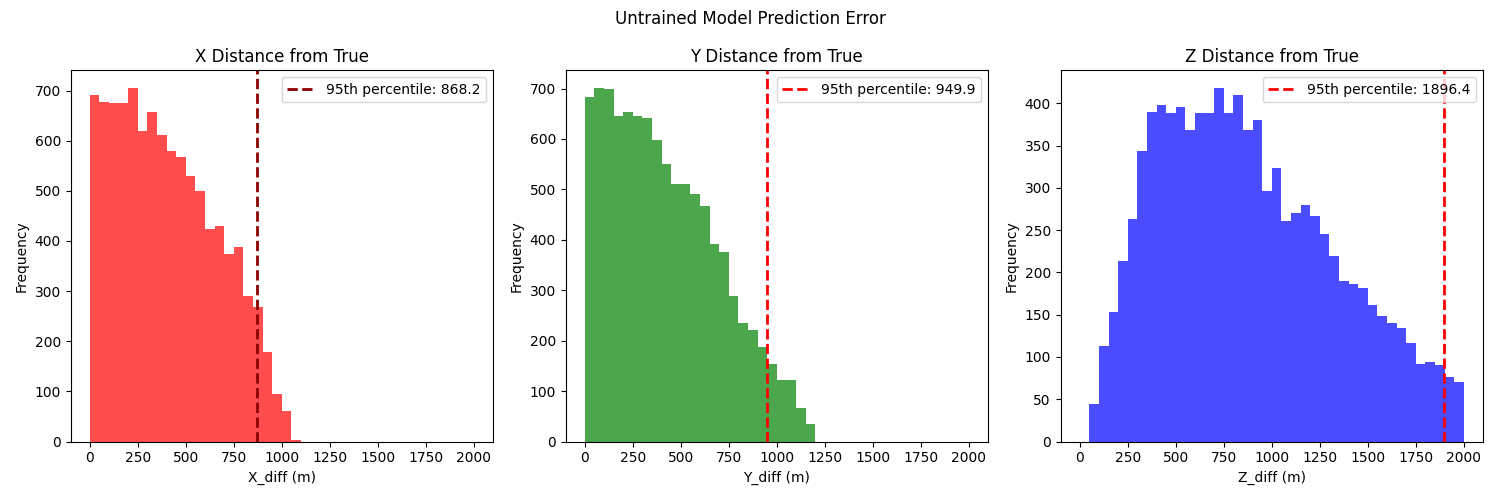

95% of X values are below: 868.24
95% of Y values are below: 949.92
95% of Z values are below: 1896.37


In [10]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 2050, 50)

# Calculate 95th percentiles
x_95th = np.percentile(x_unt, 95)
y_95th = np.percentile(y_unt, 95)
z_95th = np.percentile(z_unt, 95)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Untrained Model Prediction Error')

ax1.hist(x_unt, bins=bins, alpha=0.7, color='red')
ax1.axvline(x_95th, color='darkred', linestyle='--', linewidth=2, label=f'95th percentile: {x_95th:.1f}')
ax1.set_xlabel('X_diff (m)')
ax1.set_ylabel('Frequency')
ax1.set_title('X Distance from True')
ax1.legend()

ax2.hist(y_unt, bins=bins, alpha=0.7, color='green')
ax2.axvline(y_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {y_95th:.1f}')
ax2.set_xlabel('Y_diff (m)')
ax2.set_ylabel('Frequency')
ax2.set_title('Y Distance from True')
ax2.legend()

ax3.hist(z_unt, bins=bins, alpha=0.7, color='blue')
ax3.axvline(z_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {z_95th:.1f}')
ax3.set_xlabel('Z_diff (m)')
ax3.set_ylabel('Frequency')
ax3.set_title('Z Distance from True')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"95% of X values are below: {x_95th:.2f}")
print(f"95% of Y values are below: {y_95th:.2f}")
print(f"95% of Z values are below: {z_95th:.2f}")